In [1]:
#Importing ne essary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import simplefilter
simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
#Loading the dataset
df = pd.read_csv('who_data.csv')

# Data Exploration

In [3]:
#Dlisplaying the summary of the dataframe to get some useful informatio 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

- From the above, it can be seen that there were 32561 subjects described with 15 features(columns)
- There do not appear to be any missing values but further checks would however be carried out to confirm this
- There would be a need to take a look at the salary column, as it would ordinarily expected to be in a numerical data format

In [4]:
#Displaying 10 random rows from the data for some insight
df.sample(10)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
2437,39,State-gov,267581,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
7114,39,Private,165799,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
26860,52,Private,156953,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,>50K
30681,39,Private,110426,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,45,United-States,>50K
19189,35,Private,172694,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
27575,51,Private,157043,11th,7,Widowed,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
22125,40,Private,55508,7th-8th,4,Divorced,Farming-fishing,Unmarried,White,Female,0,0,40,United-States,<=50K
1664,44,Private,443040,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28473,31,Private,373185,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,0,42,Mexico,<=50K
25467,31,Private,209538,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K


- There appears to be some erronous imputs in the dataframe, as '?' was observed as imput in a few columns. This would require checking each data column for the erronous imputs
- The salary column also seems to have just categorised the subjects into individuals earning above 50k and individuals earning less or equal to 50k. This would also be confirmed

In [5]:
#Checking for null values
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

- There are no null values in the data, so attention would be on treating the errornous imputs in the data

In [6]:
#Checking for duplicate values
df.duplicated().sum()

24

- From the above, it can be seen that there are 24 duplicated rows in the dataframe. This is noted for cleaning

In [7]:
#Taking a closer look at the duplicated rows
duplicate_rows = df.duplicated()
duplicate_df = df[duplicate_rows]
duplicate_df

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


### Exploring the columns for erronous imputs

In [8]:
#Displaying the unique values in the age column
print(df['age'].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


In [9]:
#Displaying the unique values in the fnlwgt column
print(df['fnlwgt'].unique())

[ 77516  83311 215646 ...  34066  84661 257302]


In [10]:
df['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [11]:
#Displaying the unique values in the workclass column
print(df['workclass'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


- Whitespaces(empty spaces) can be observed at the beginning of the values in this column

In [12]:
#Displaying the value counts of the workclass column
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

- It can be seen that there are 1836 erronous imputs in the workclass column

In [13]:
#Displaying the unique values in the education column
print(df['education'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


- Whitespaces can also be observed at the beginning of the values in this column

In [14]:
#Displaying the unique values in the education_no_of_years column
print(df['education_no_of_years'].unique())

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


In [15]:
#Displaying the unique values in the marital_status column
print(df['marital_status'].unique())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


- Whitespaces can be observed at the beginning of the values in this column

In [16]:
#Displaying the unique values in the occupation column
print(df['occupation'].unique())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


- Erronous imputs as well as whitespaces can be observed in the values in this column

In [17]:
#Displaying the unique values in the relationship column
print(df['relationship'].unique())

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


- Whitespaces can be observed at the beginning of the values in this column

In [18]:
#Displaying the unique values in the race column
print(df['race'].unique())

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


- Whitespaces can be observed at the beginning of the values in this column

In [19]:
#Displaying the unique values in the sex column
print(df['sex'].unique())

[' Male' ' Female']


In [20]:
#Displaying the unique values in the capital_loss column
print(df['capital_loss'].unique())

[   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653
 2392 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547
 2174 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004
 2231 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603
 2282  323 4356 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155
 3900 2201 1944 2467 2163 2754 2472 1411]


In [21]:
#Displaying the unique values in the working_hours_per_week column
print(df['working_hours_per_week'].unique())

[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95]


In [22]:
#Displaying the unique values in the native_country column
print(df['native_country'].unique())

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


- Whitespaces can be observed at the beginning of the values in this column. There also appears to be errornous imputs in the column

In [23]:
#Displaying the unique values in the salary column
print(df['salary'].unique())

[' <=50K' ' >50K']


- Whitespaces can be observed at the beginning of the values in this column

In [24]:
#Checking the descriptive statistics of the data
df.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [25]:
#Checking the description of the categorical features as well
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_no_of_years,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital_status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

#Removing the whitespaces in the occupation column using the .strip() method
df['occupation'] = df['occupation'].astype(str).str.strip()

In [26]:
#Removing whitespaces from all columns where they exist in the dataframe ushing the .strip() method
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

- The errornous imput can be seen to cut across different age groups, sex, educational background and marital status. They would therefore be imputed with 'Unknown Occupation'

In [27]:
#Removing duplicated rows from the dataframe
df.drop_duplicates(inplace=True)

In [28]:
#Checking for duplicate values
df.duplicated().sum()

0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_no_of_years   32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  working_hours_per_week  32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  object
dtypes:

## Data Visualisation

In [30]:
# Creating a function for percentage labeled bar plot
def labeled_barplots(data, feature, perc=False, n=None, title=None):
    """
  Barplot with percentage at the top
  data: dataframe
  feature: dataframe column
  perc: whether to display percentages instead of count (default is False)
  n:displays the top n categoty levels (default is none, i.e., display all levels)
  """

    total = len(data[feature]) #length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette='Paired',
                       order=data[feature].value_counts().index[:n].
                       sort_values(),)
    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(100 * p.get_height() / total) #percentage of each class of the category
        else:
            label = p.get_height() #count of each level of the category
        x = p.get_x() + p.get_width() / 2 #width of the plot
        y = p.get_height() #height of the plot

        ax.annotate(label, (x, y), ha='center', va='center', size=12,
                    xytext=(0, 5), textcoords='offset points',) #annotate the percentage
    if title:
        plt.title(title)
    plt.show()

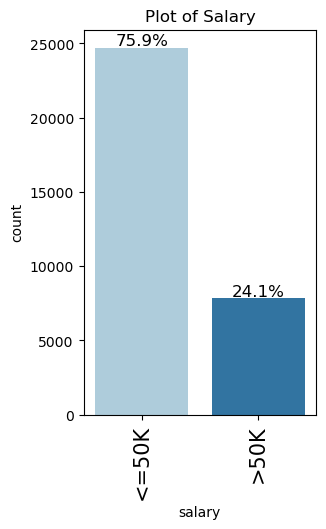

In [31]:
labeled_barplots(df, 'salary', perc=True, n=None, title='Plot of Salary')

In [32]:
#Encoding the target variuable 'salary' into numerical variable

from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the label encoder on the 'salary' column
df['salary_encoded'] = label_encoder.fit_transform(df['salary'])

In [33]:
#Displaying the encoded target feature and its corresponding labels
label_values = label_encoder.classes_
label_codes = label_encoder.transform(label_values)

# Display the labels and their corresponding values
for label, code in zip(label_values, label_codes):
    print(f"Label: {label} - Encoded Value: {code}")

Label: <=50K - Encoded Value: 0
Label: >50K - Encoded Value: 1


In [34]:
#Determining the correlation betweeen the numerical features of the dataframe
num_var = df.select_dtypes(include = 'number')
mat_cor = num_var.corr()
mat_cor

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,salary_encoded
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education_no_of_years,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
working_hours_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
salary_encoded,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


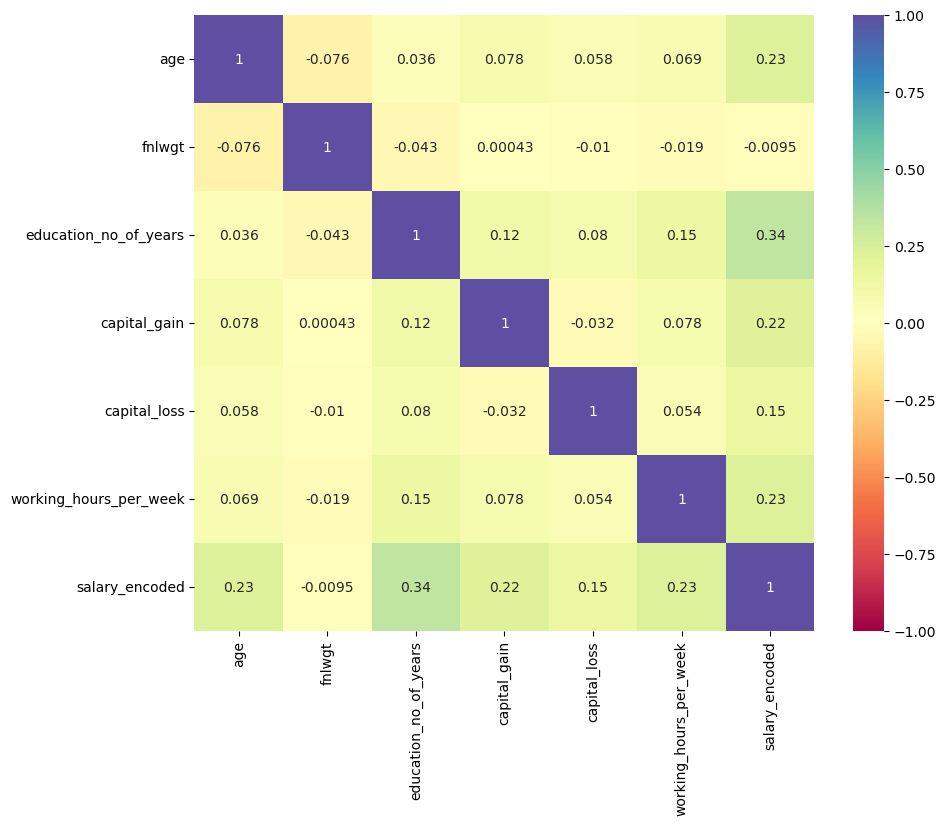

In [35]:
#Creating a heatmap visualization of the correlation matrix

plt.figure(figsize = (10, 8))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral');

- There seem to be some level of positive correlation betweeen the salary and working hours, years of education, age and capital gain

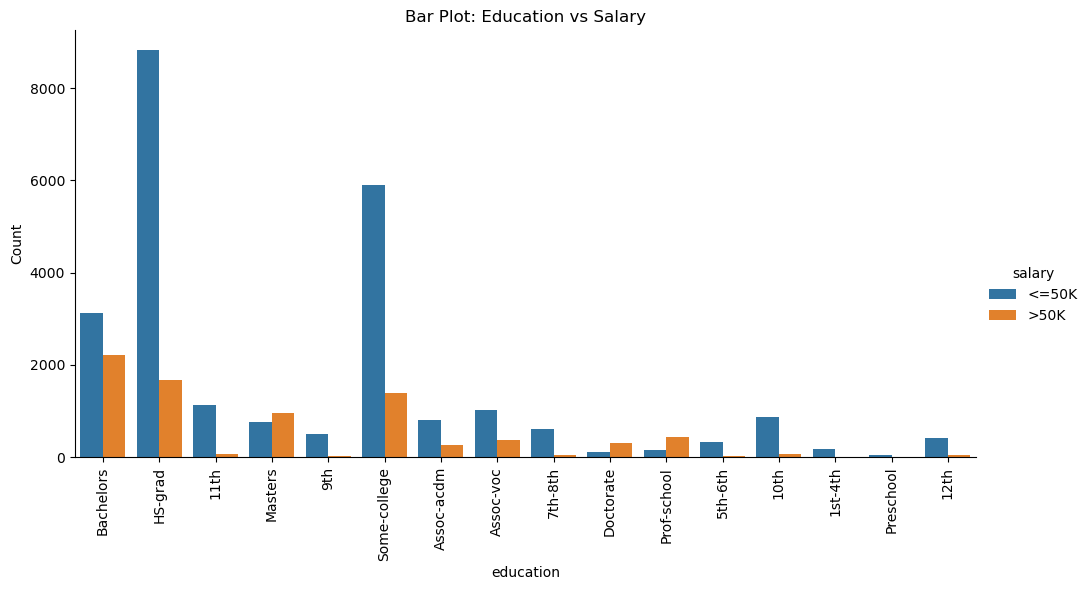

In [36]:
# Creating a grouped bar plot for individaul level of education

sns.catplot(data=df, x='education', hue='salary', kind='count', height=5, aspect=2)

# Set x-label, y-label, and title for the plot
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Bar Plot: Education vs Salary')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Save the plot as an image file
plt.savefig("bar_plot_education_salary.png")

# Display the plot
plt.show()


- From this bar plot, it can be seen that the relative number of people earning >50k is higher for people with higher level of education than people with lower levvel of educcation, while more people with lower level of education earn <=50k

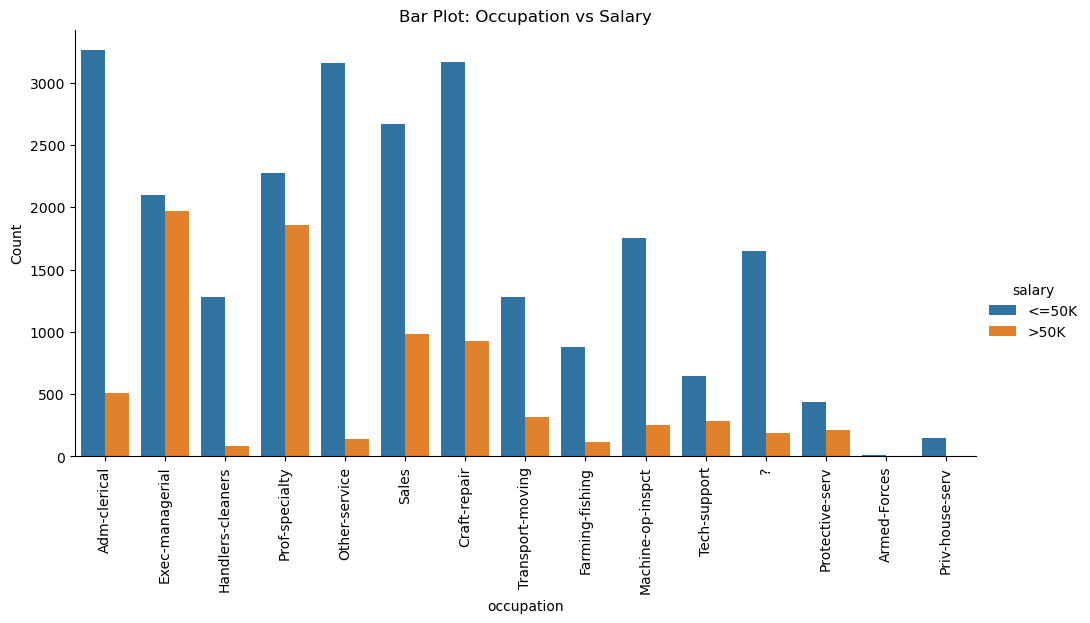

In [37]:
# Creating a grouped bar plot of occupation and salary

sns.catplot(data=df, x='occupation', hue='salary', kind='count', height=5, aspect=2)

# Set x-label, y-label, and title for the plot
plt.xlabel('occupation')
plt.ylabel('Count')
plt.title('Bar Plot: Occupation vs Salary')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Save the plot as an image file
plt.savefig("occupation.png")

# Display the plot
plt.show()


- The bar plot above shows that there is good level of correlation between occupation and salary

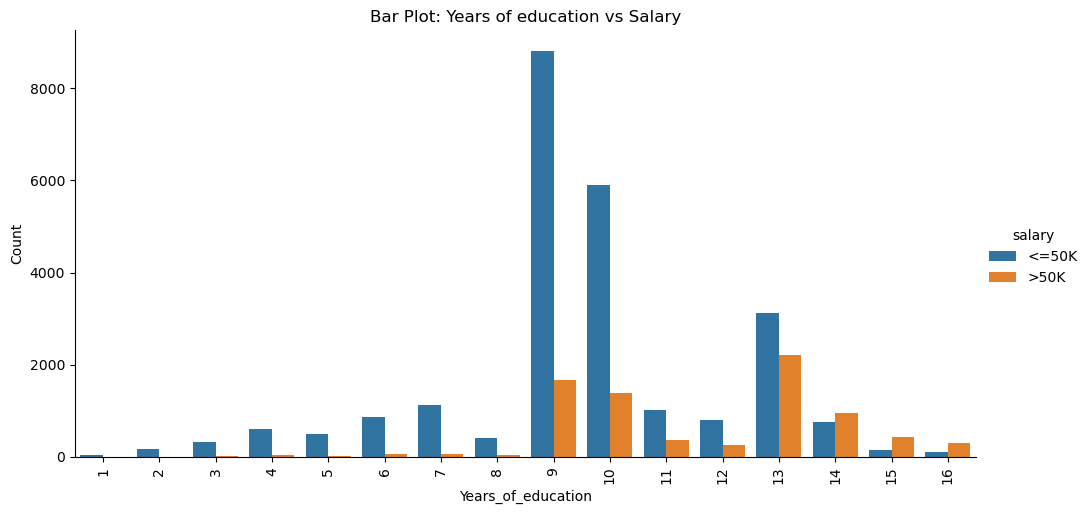

In [38]:
# Creating a grouped bar plot of years of education and salary
sns.catplot(data=df, x='education_no_of_years', hue='salary', kind='count', height=5, aspect=2)

# Set x-label, y-label, and title for the plot
plt.xlabel('Years_of_education')
plt.ylabel('Count')
plt.title('Bar Plot: Years of education vs Salary')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Save the plot as an image file
plt.savefig("Year_of_education_salary.png")

# Display the plot
plt.show()


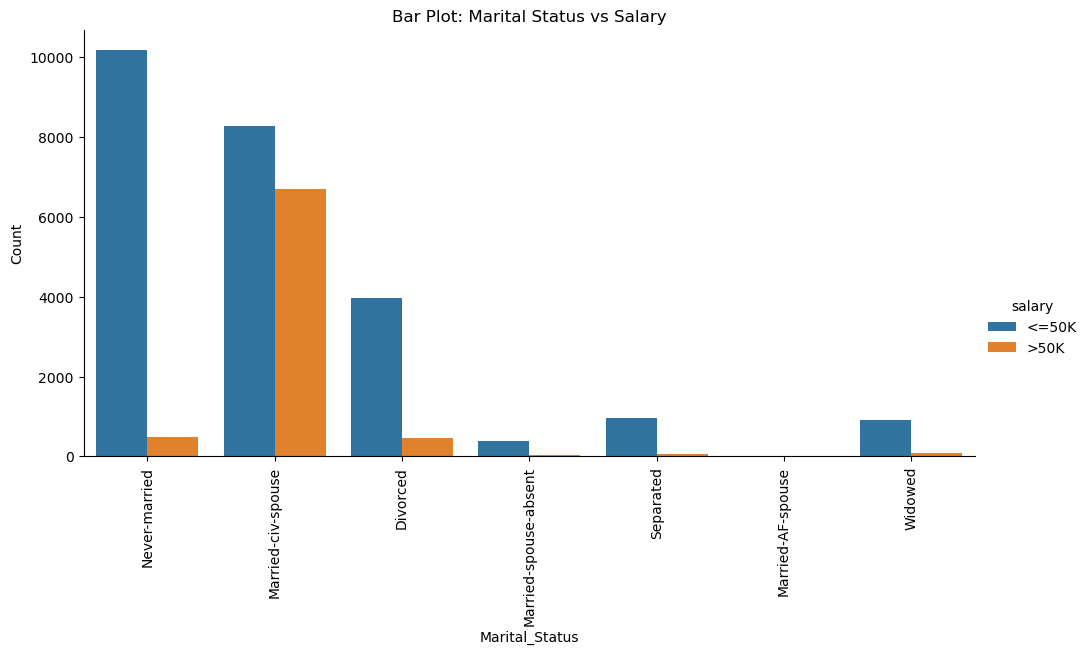

In [39]:
sns.catplot(data=df, x='marital_status', hue='salary', kind='count', height=5, aspect=2)

# Set x-label, y-label, and title for the plot
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Bar Plot: Marital Status vs Salary')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Save the plot as an image file
plt.savefig("Marital_status_salary.png")

# Display the plot
plt.show()

- The above plot says that married people are more likely to earn salaries >50k when compared to people with other marital status

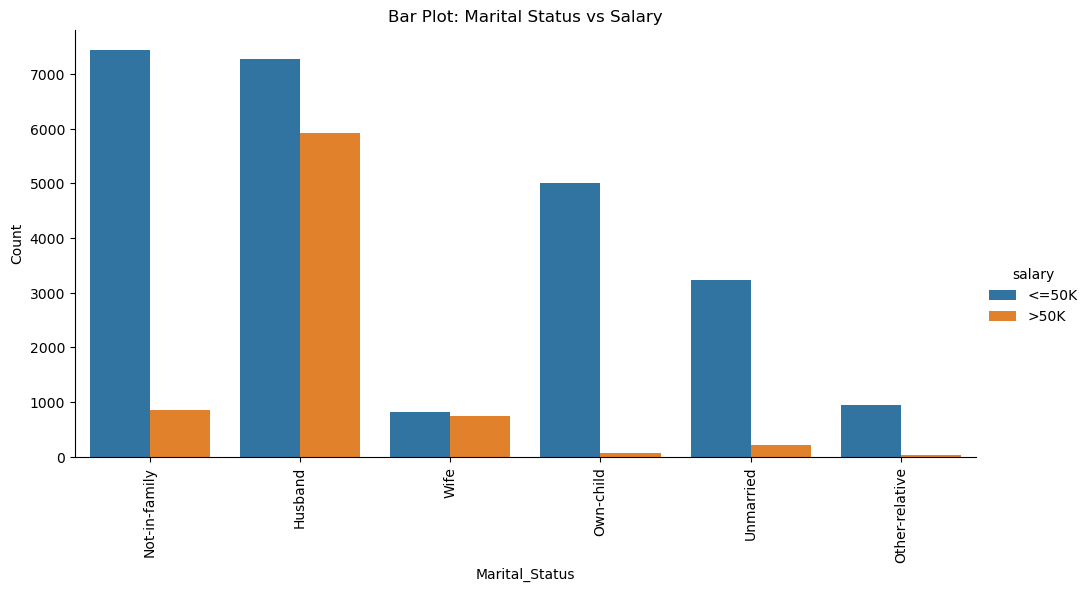

In [40]:
sns.catplot(data=df, x='relationship', hue='salary', kind='count', height=5, aspect=2)

# Set x-label, y-label, and title for the plot
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Bar Plot: Marital Status vs Salary')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Save the plot as an image file
plt.savefig("relationship_salary.png")

# Display the plot
plt.show()

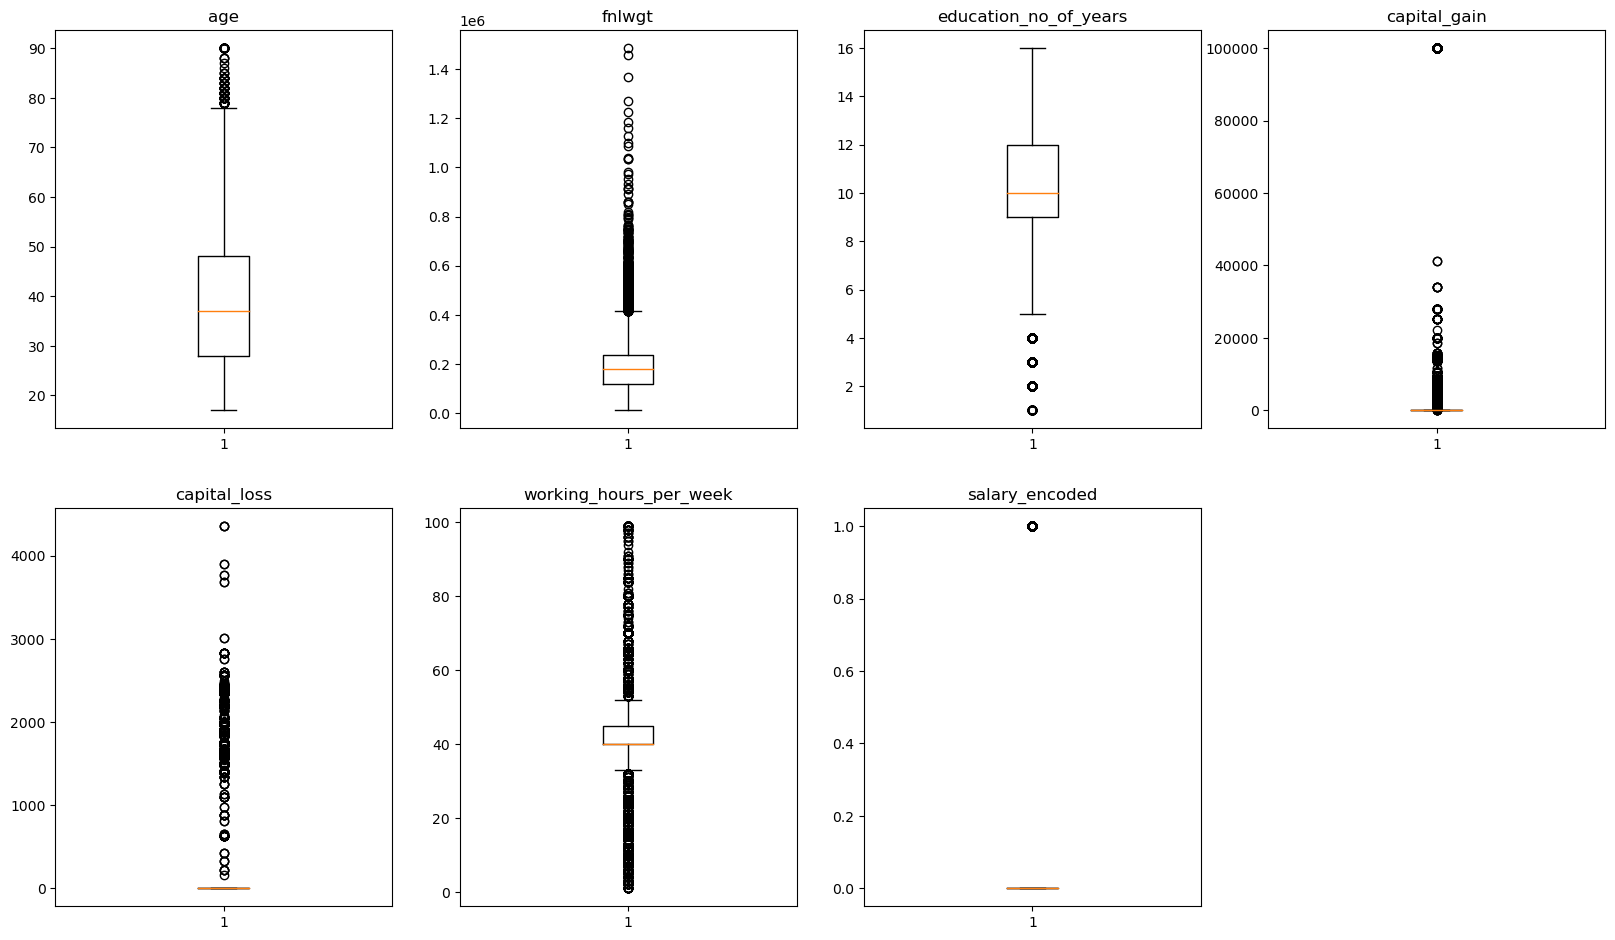

In [41]:
#Creating box plots to detect outliers in the numerical variable

plt.figure(figsize = (20, 30))

for i, variable in enumerate(num_var):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)

plt.show()

In [42]:
# Treating the outliers in the variables

# Dropping the target variable first
num_var.drop('salary_encoded', axis = 1, inplace = True)

# Defining a function to treat the outliers. vg being the data frame, an col being the name of the variable
# The various quantile of the data is also determined
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    
# Clipping the outliers to the upper and lower whiskers

    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)
    return df
df = treat_outliers_all(df, num_var)

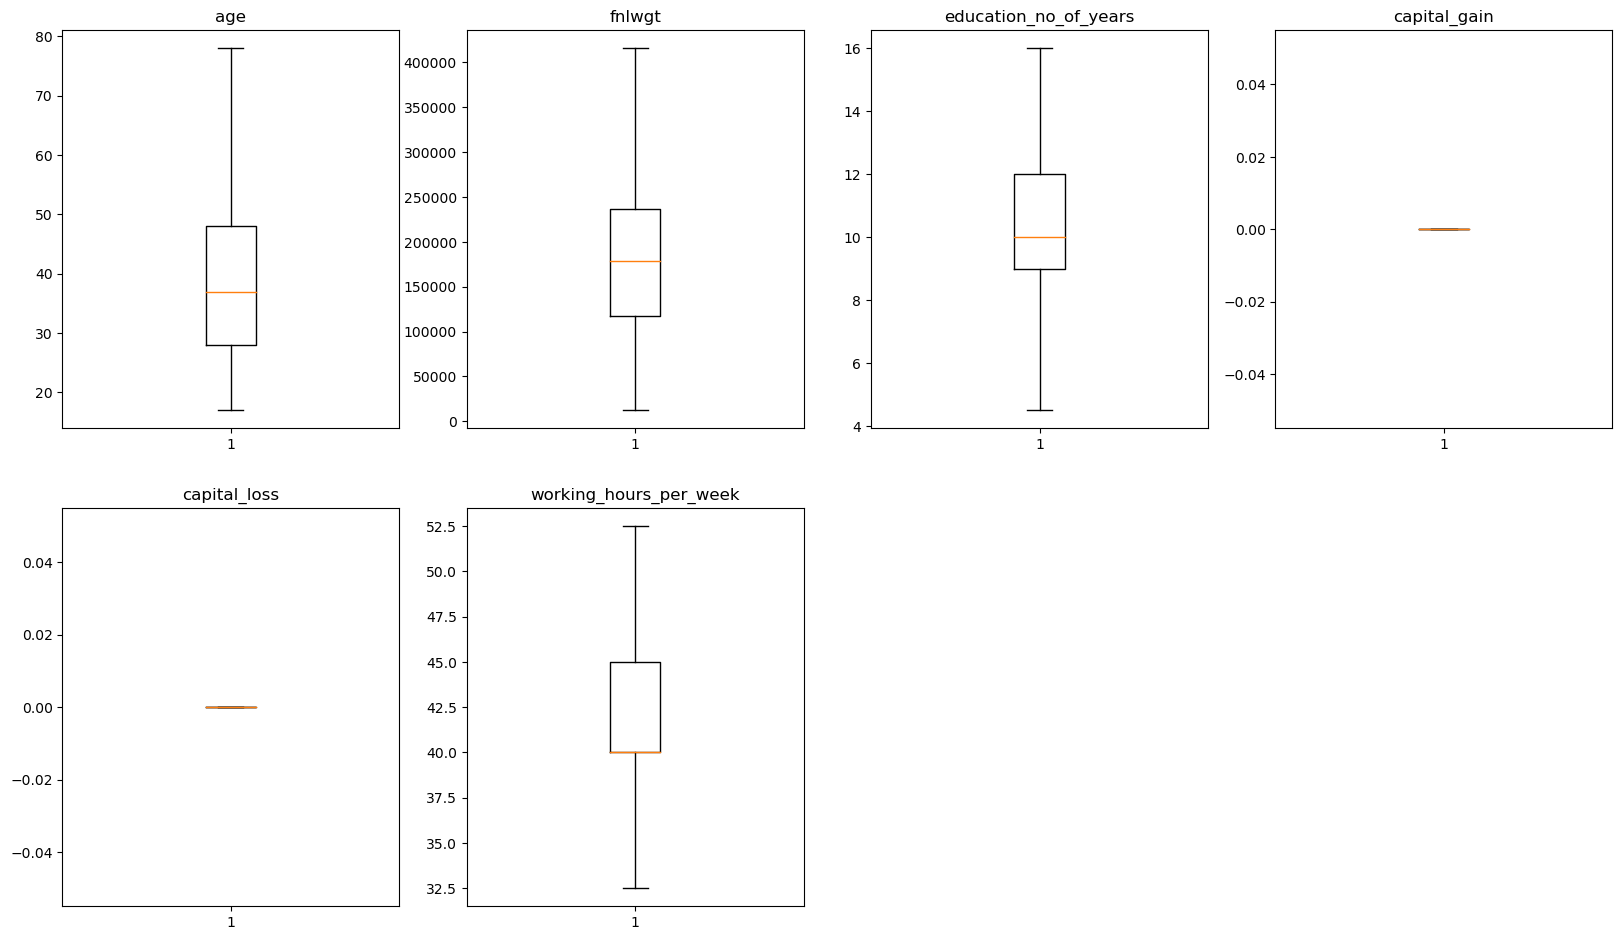

In [43]:
#Creating box plots to visualise the numerical variables after outlier treatment

plt.figure(figsize = (20, 30))

for i, variable in enumerate(num_var):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
    plt.title(variable)

plt.show()

In [44]:
#Importing soe necessary sikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [45]:
#Creating dataframes for the dependent and independent variables
X = df.drop(['fnlwgt', 'relationship', 'sex', 'salary','native_country', 'salary_encoded'], axis = 1)
y = df['salary_encoded']

In [46]:
#Splitting the dataset into training, validation and test sets. 20% has been assigned to 
#the test set, of the remainder is split 80:20, training:validation
x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size = 0.2, random_state = 0)

In [47]:
y_train.value_counts(normalize = True)

0    0.760121
1    0.239879
Name: salary_encoded, dtype: float64

In [48]:
y_test.value_counts(normalize = True)

0    0.750768
1    0.249232
Name: salary_encoded, dtype: float64

In [49]:
#Importing the SimpleImputer labrary to impute missing values(?)
from sklearn.impute import SimpleImputer

In [50]:
#Imputing the most frequent values in the place of the missing values
imp = SimpleImputer(missing_values = '?', strategy = 'most_frequent')

cols = ['workclass', 'occupation']

x_train[cols] = imp.fit_transform(x_train[cols])
x_val[cols] = imp.transform(x_val[cols])
x_test[cols] = imp.transform(x_test[cols])

In [51]:
#OneHotEncoding the categorical features to convert them into numbers
categorical_cols = ['workclass', 'occupation', 'education', 'marital_status', 'race']
x_train = pd.get_dummies(x_train, columns=categorical_cols)
x_val = pd.get_dummies(x_val, columns=categorical_cols)
x_test = pd.get_dummies(x_test, columns=categorical_cols)

In [52]:
#Scaling the features in the dataframe putting values in each feature within a consistent scale
scaler = MinMaxScaler()

x_train_sd = scaler.fit_transform(x_train)
x_val_sd = scaler.transform(x_val)
x_test_sd = scaler.transform(x_test)

In [53]:
#Buliding the model using the training set
from sklearn.linear_model import LogisticRegression

#Creating an instance of the logistic regression model
log_reg = LogisticRegression(random_state = 0)

log_reg.fit(x_train_sd, y_train)

/Users/oluwafemiolobashola/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [54]:
#Computing the accuracy of the model
log_reg.score(x_train_sd, y_train)

0.8341737501800893

- This is an indicartion of over fitting, and needs to be investigated further

In [55]:
#Importing performance metrics libraries
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             f1_score, confusion_matrix)

In [56]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

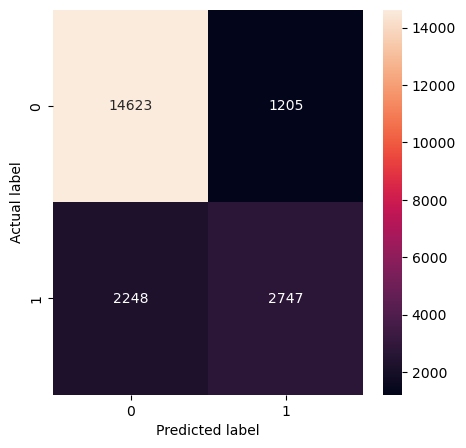

,Accuracy,Recall,Precision,F1-score
0,0.834174,0.54995,0.695091,0.614061


In [57]:
#Evaluating the performance of the model on the training set
log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)
log_reg_train

- With an accuray of 83%, the model is able to accurately predict the salary scale of individuals 83 times out of 100
- A recall of 55% indicates that of all the salaries the model predicts to be >50k, 55% of these predictions are correct.
- A precision of 70% tells us that 70% of those the model predict to earn a salary of >50k really do earn salaries>50k
- The F1-score of 61% also does tells us that the model is fairly good in it's predictions
- The above four metrics therefore tells us that the model is doing moderately well

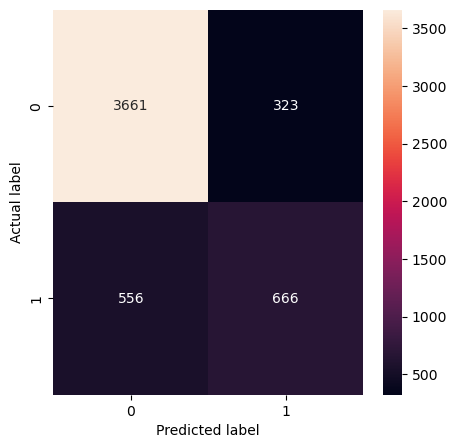

,Accuracy,Recall,Precision,F1-score
0,0.831156,0.545008,0.673407,0.602442


In [58]:
#Evaluating the performance of the model on the validation set
log_reg_val = model_performance_classification(log_reg, x_val_sd, y_val)
log_reg_val

- The performance metrics of the model on the validation set slightly improves over the training set, and this is an indication that the model is generalizing well. 

In [59]:
#Rebuliding the model, and specifying the the class weight, so attention us given to the minority class of the target

log_reg1 = LogisticRegression(random_state = 0, class_weight = {1:0.9, 0:0.1})

log_reg1.fit(x_train_sd, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, random_state=0)

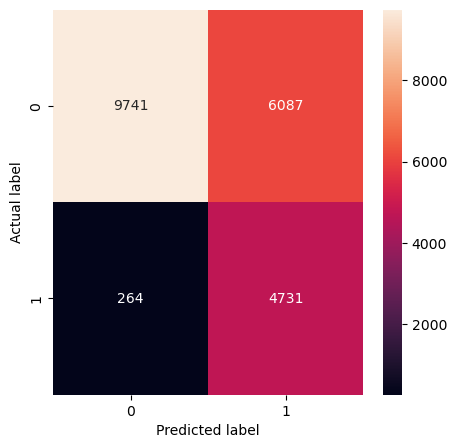

,Accuracy,Recall,Precision,F1-score
0,0.695001,0.947147,0.437327,0.598368


In [60]:
#Checking the performance of the model, after specifying the class weight
log_reg_train = model_performance_classification(log_reg1, x_train_sd, y_train)
log_reg_train

- specifying a class weight of 90:10 leads to a reduction in the performance of the model

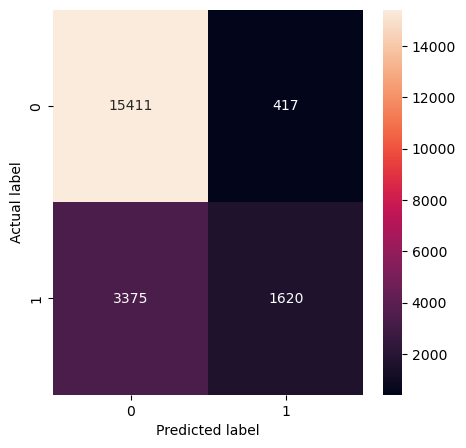

,Accuracy,Recall,Precision,F1-score
0,0.817894,0.324324,0.795287,0.460751


In [61]:
#Re-training the model using an increased threshold of 0.7
log_reg2_train = model_performance_classification(log_reg, x_train_sd, y_train, threshold = 0.7)
log_reg2_train

- Increasinng the threshold of the model also does not bring about any significant imporvement in the performance of the model

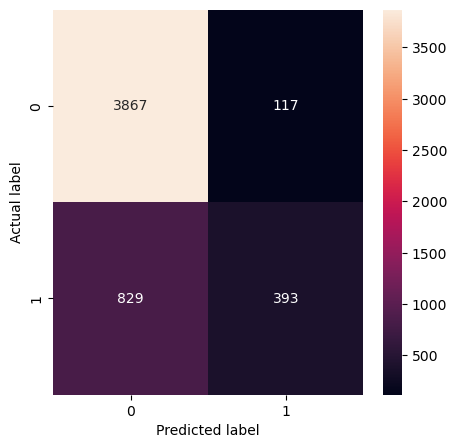

,Accuracy,Recall,Precision,F1-score
0,0.818287,0.321604,0.770588,0.453811


In [62]:
#Evaluating the performance of the model using the increased threshold and the validation set
log_reg2_val = model_performance_classification(log_reg, x_val_sd, y_val, threshold = 0.7)
log_reg2_val

- This also generalizes well, but doesn't improve the performance of the model significantly

## Treating Data Imbalance

- As was earlier observed, there was an imbalance in the proportion of individuals earning salaries <=50k and those on >50k. This can significantly impact the ability of the model to make accurate predictions of salaries. It is therefore important to treat this imbalance, and one of the means of doing this is by using the Synthetic Minority Oversampling Technique (SMOTE)method

In [63]:
#Importing necessary libraries
from imblearn.over_sampling import SMOTE

### Imbalance Treatment Using SMOTE

In [64]:
#Checking the target feature before the data balancing
y.value_counts(normalize = True)

0    0.759074
1    0.240926
Name: salary_encoded, dtype: float64

In [65]:
#Creating dataframes for the variables
X = df.drop(['fnlwgt', 'relationship', 'sex', 'salary','native_country', 'salary_encoded'], axis = 1)
y = df['salary_encoded']

In [66]:
#Imputing the most frequent values in the place of missing values
imp = SimpleImputer(missing_values = '?', strategy = 'most_frequent')

cols = ['workclass', 'occupation']

X[cols] = imp.fit_transform(X[cols])

In [67]:
#OneHotEncoding categorical variables to convert them to numerical variables
categorical_cols = ['workclass', 'occupation', 'education', 'marital_status', 'race']
X = pd.get_dummies(X, columns=categorical_cols)

In [68]:
#SMOTE treatment of the original dependent and independent variables
smote = SMOTE(random_state = 0)

X_sm, y_sm = smote.fit_resample(X, y)

In [69]:
#Rechecking the target variable after data balancing for confirmation
y_sm.value_counts(normalize = True)

0    0.5
1    0.5
Name: salary_encoded, dtype: float64

- The two clsses in the target variable can now be seen to be having 50% contribution each

In [70]:
# SPlitting the treated variables into the training, validation and the testing splits
x3_temp, x3_test, y3_temp, y3_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)
x3_train, x3_val, y3_train, y3_val = train_test_split(x3_temp, y3_temp, test_size = 0.2, random_state = 0)

In [71]:
#Scaling the features in the dataframe putting values in each feature within a consistent scale
scaler = MinMaxScaler()

x3_train_sd = scaler.fit_transform(x3_train)
x3_val_sd = scaler.transform(x3_val)
x3_test_sd = scaler.transform(x3_test)

In [72]:
#Building the model using the training set of the balanced data
log_reg_sm = LogisticRegression(random_state = 0)

log_reg_sm.fit(x3_train_sd, y3_train)

/Users/oluwafemiolobashola/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

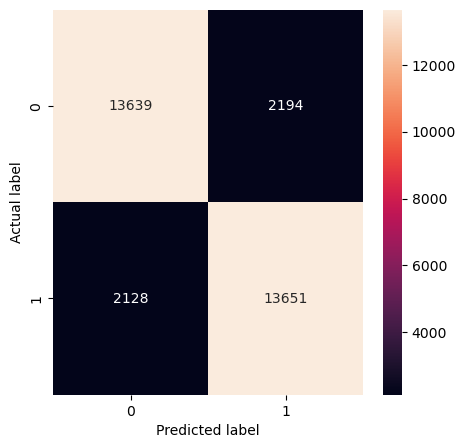

,Accuracy,Recall,Precision,F1-score
0,0.86328,0.865137,0.861534,0.863332


In [73]:
#Checking the performance of the model built using the training set of the balanced data
log3_reg_train = model_performance_classification(log_reg_sm, x3_train_sd, y3_train)
log3_reg_train

###### - Improvements can be seen on all the performance metrics
- With an accuray of 86%, the model is able to correctly predict the salary scale of individuals 86 times out of 100
- A recall of 87% indicates that of all the salaries the model predicts to be >50k, 87% of these predictions are correct.
- A precision of 86% tells us that 89% of those the model predict to earn a salary of >50k really do earn salaries >50k
- The F1-score of 86% also does tells us that the model is fairly good in it's predictions
- The above four metrics therefore tells us that the model is doing really well

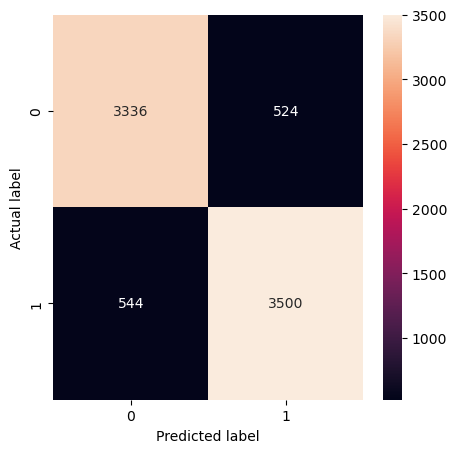

,Accuracy,Recall,Precision,F1-score
0,0.864879,0.86548,0.869781,0.867625


In [74]:
#Checking the performance of the model using the validation set of the balanced data
log3_reg_val = model_performance_classification(log_reg_sm, x3_val_sd, y3_val)
log3_reg_val

The model can be seen to be generalizing well as the performance on the validation data is close to that of the training data

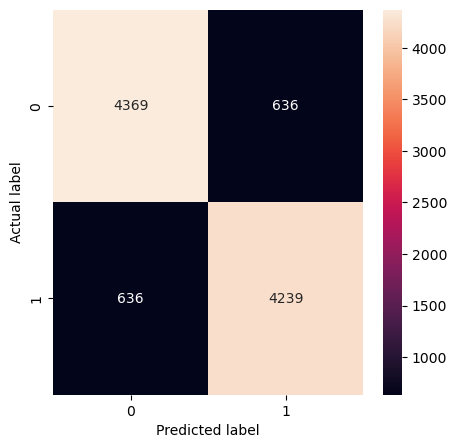

,Accuracy,Recall,Precision,F1-score
0,0.871255,0.869538,0.869538,0.869538


In [75]:
#Checking the performance of the model using the test set of the balanced data
log3_reg_test = model_performance_classification(log_reg_sm, x3_test_sd, y3_test)
log3_reg_test

### Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
#Building the decision tree model using the training set
dec_tree = DecisionTreeClassifier(random_state = 0)

dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

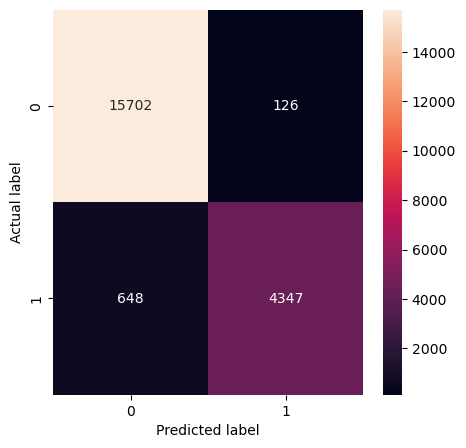

,Accuracy,Recall,Precision,F1-score
0,0.96283,0.87027,0.971831,0.918251


In [78]:
#Checking the performance of the model using the training set of the data
dec_tree_train = model_performance_classification(dec_tree, x_train, y_train)
dec_tree_train

- The model is seen to perfom really well on all parameters; having a prediction accuracy of 96%, precision of 97%, recall of 87% and F1-score of 92%. There is however a need to still check the model on the validation and the test sets as well to make sure the model isn't overfitting

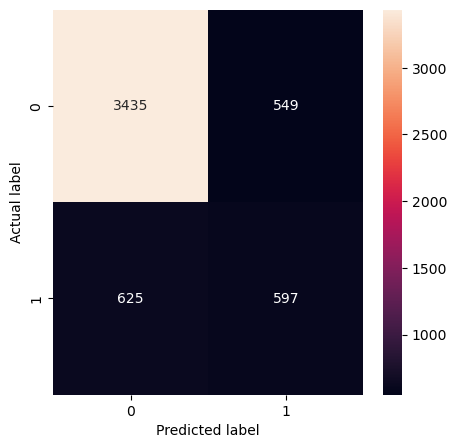

,Accuracy,Recall,Precision,F1-score
0,0.774491,0.488543,0.520942,0.504223


In [79]:
#Checking the performance of the model using the validationset of the data
dec_tree_val = model_performance_classification(dec_tree, x_val, y_val)
dec_tree_val

- The model is obviously overfitting, owing to the drastic drop in its performance when compare to the training set. Tge model seems to have mastered the training set well, which explains its initialperformance

dec_tree_test = model_performance_classification(dec_tree, x_test, y_test)
dec_tree_test

## Model Improvement

### Adjusting the class weight

In [80]:
#Re-Building the decision tree model whiile adjusting the class weight
dec_tree2 = DecisionTreeClassifier(random_state = 0, class_weight = {0:0.1, 1:0.9})

dec_tree2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=0)

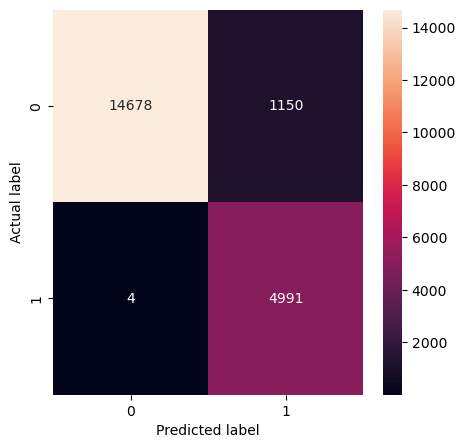

,Accuracy,Recall,Precision,F1-score
0,0.944581,0.999199,0.812734,0.896372


In [81]:
dec_tree2_train = model_performance_classification(dec_tree2, x_train, y_train)
dec_tree2_train

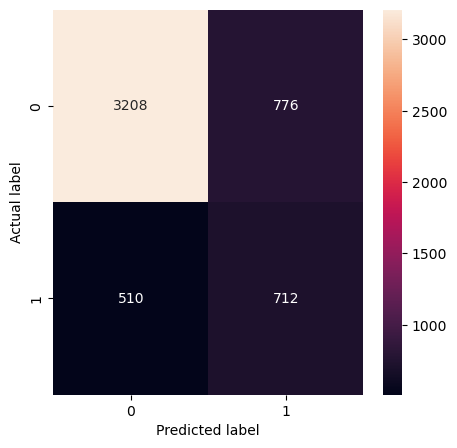

,Accuracy,Recall,Precision,F1-score
0,0.752977,0.582651,0.478495,0.525461


In [82]:
#Checking the performance of the model using the validationset of the data
dec_tree2_val = model_performance_classification(dec_tree2, x_val, y_val)
dec_tree2_val

- The model can be see to still overfit despite adjusting the class weight

### Balancing dataset

In [83]:
#Balancing the data using SMOTE
smote = SMOTE(random_state = 0)

X_sm, y_sm = smote.fit_resample(X, y)

In [84]:
#Splitting the dataset into training, validation and test sets
x_temp_sm, x_test_sm, y_temp_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)
x_train_sm, x_val_sm, y_train_sm, y_val_sm = train_test_split(x_temp_sm, y_temp_sm, test_size = 0.2, random_state = 0)

In [85]:
#Building a new model using the balanced data
dec_tree3 = DecisionTreeClassifier(random_state = 0)

dec_tree3.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=0)

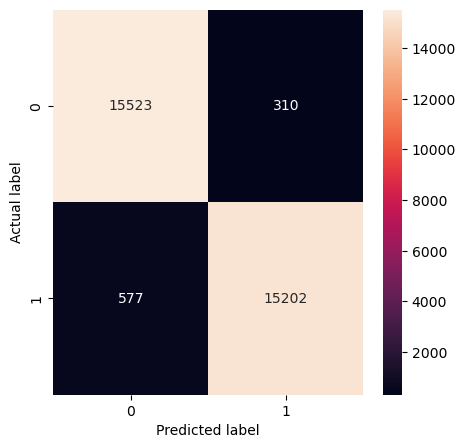

,Accuracy,Recall,Precision,F1-score
0,0.971941,0.963432,0.980015,0.971653


In [86]:
#Checking the performance of the model on the training set
dec_tree3_train = model_performance_classification(dec_tree3, x_train_sm, y_train_sm)
dec_tree3_train

- The decision tree model performance is still appearinng quite high and likely to still be over fitting. It would therefore also be examined using the validation data

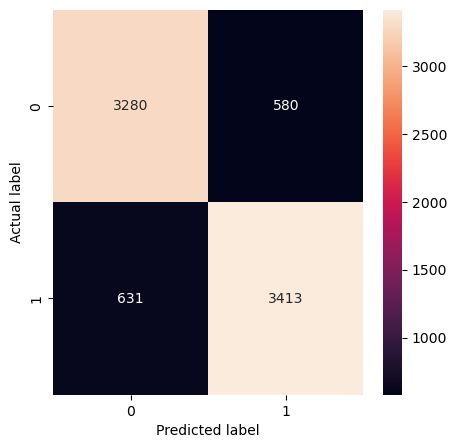

,Accuracy,Recall,Precision,F1-score
0,0.846786,0.843966,0.854746,0.849322


In [87]:
#Checking the performance of the model using the validation set
dec_tree3_val = model_performance_classification(dec_tree3, x_val_sm, y_val_sm)
dec_tree3_val

- There is yet again a drop in the performance of the model on the validation set compared to the training set, which is an indication of overfitting

### Applying pre_pruning

In [88]:
#Rebuilding the model by tuning the one of the hyperparameters of the tree; the maximum depth,
#which helps prevent the model from ovdrfitting, by stopping it from its pursuance of perfection
dec_tree4 = DecisionTreeClassifier(random_state = 0, max_depth = 4)

dec_tree4.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=4, random_state=0)

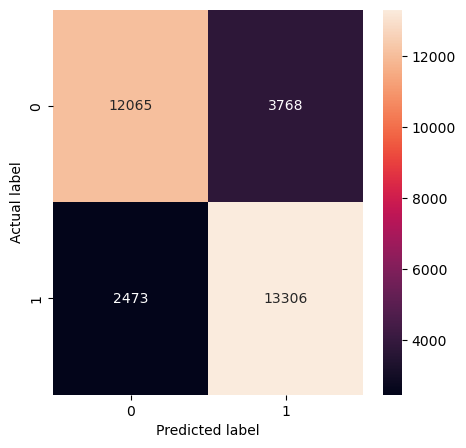

,Accuracy,Recall,Precision,F1-score
0,0.802575,0.843273,0.779314,0.810033


In [89]:
#Checking the performance of the model
dec_tree4_train = model_performance_classification(dec_tree4, x_train_sm, y_train_sm)
dec_tree4_train

- The pruned model can indeed be seen to have tended less towards overfitting

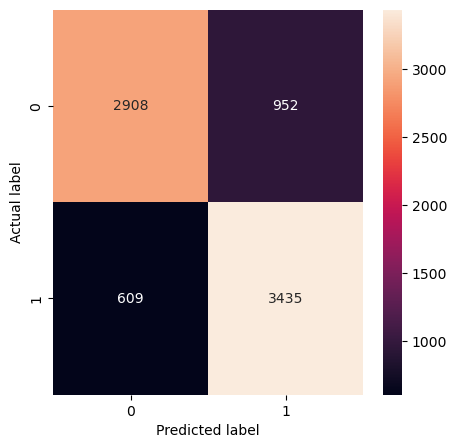

,Accuracy,Recall,Precision,F1-score
0,0.802505,0.849407,0.782995,0.81485


In [90]:
#Checking the performance of the pruned m,odel using the validation set
dec_tree4_val = model_performance_classification(dec_tree4, x_val_sm, y_val_sm)
dec_tree4_val

- The model is now generalising, following the hyperparameter tunning applied to it

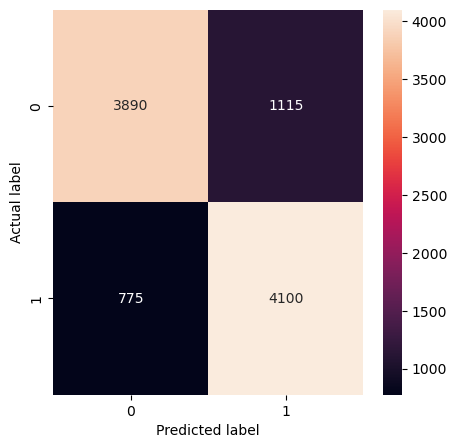

,Accuracy,Recall,Precision,F1-score
0,0.808704,0.841026,0.786194,0.812686


In [91]:
#Checking the performance of the model on the test set
dec_tree4_test = model_performance_classification(dec_tree4, x_test_sm, y_test_sm)
dec_tree4_test

- The model indeed generalises well on all data splits.

## Model Comparism

- Taking a look at the performanc of the Logistic Regression model and Decision Tree model performances, after model improvement techniques have been applied to both models, the Logistics Regression appears to do a better job as predicting the income of individuals as shown below;


### Logistic Regression

- With an accuray of 87%, the model is able to correctly predict the salary scale of individuals 87 times out of 100
- A recall of 87% indicates that of all the salaries the model predicts to be >50k, 87% of these predictions are correct.
- A precision of 87% tells us that 87% of those the model predict to earn a salary of >50k really do earn salaries >50k
- The F1-score of 87% also does tells us that the model is fairly good in it's predictions


### Decision Tree Regression

- With an accuray of 81%, the model is able to correctly predict the salary scale of individuals 81 times out of 100
- A recall of 84% indicates that of all the salaries the model predicts to be >50k, 84% of these predictions are correct.
- A precision of 87% tells us that 79% of those the model predict to earn a salary of >50k really do earn salaries >50k
- The F1-score of 81% also does tells us that the model is fairly good in it's predictions



##### These metrics are therefore enough reasons to base choosing the logistics regression over the decision tree regression upon